In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Read the document 
xlsx_sheet = ["spacy-casEN", "Choices", "Sheet1", "Evaluation"]
df_sheets = pd.read_excel("ressources/2023-11-01_consensus_NER.xlsx", sheet_name=xlsx_sheet)

df = df_sheets["spacy-casEN"]
# Remove unnecessary colomn
col = ["titles", "h","desc"]
# df = df.drop(columns=col)


In [ ]:
#df.to_csv("Result/csv/NER_consensus.csv")
df.head()

,well recognized,well categorized,titles,h,NER_label,desc,method,hash,Index,Colonne1,Colonne2
0,1,1,L'héritage,bassin d'Arcachon,LOC,"héritage Christophe Perrin, un ostréiculteur r...",spacy,1,2,NaN,NaN
1,0,0,100 jours avec les dépanneurs de l'autoroute,�,MISC,alors ce 19 tonnes qui a été... � percuté de ...,spacy,7290,23715,NaN,NaN
2,0,0,La nouvelle vague,'',MISC,"du théâtre, du cinéma avec le magazine ''La no...",spacy,1598,4822,NaN,NaN
3,0,0,Phinéas et Ferb (S4-E22),- Retour,MISC,Candice se retrouve accidentellement changée e...,spacy,2790,10108,NaN,NaN
4,1,PERS,L'héritage,Tessa,LOC,Nathalie et Marianne aimeraient la vendre. Mai...,spacy,1,6,NaN,NaN


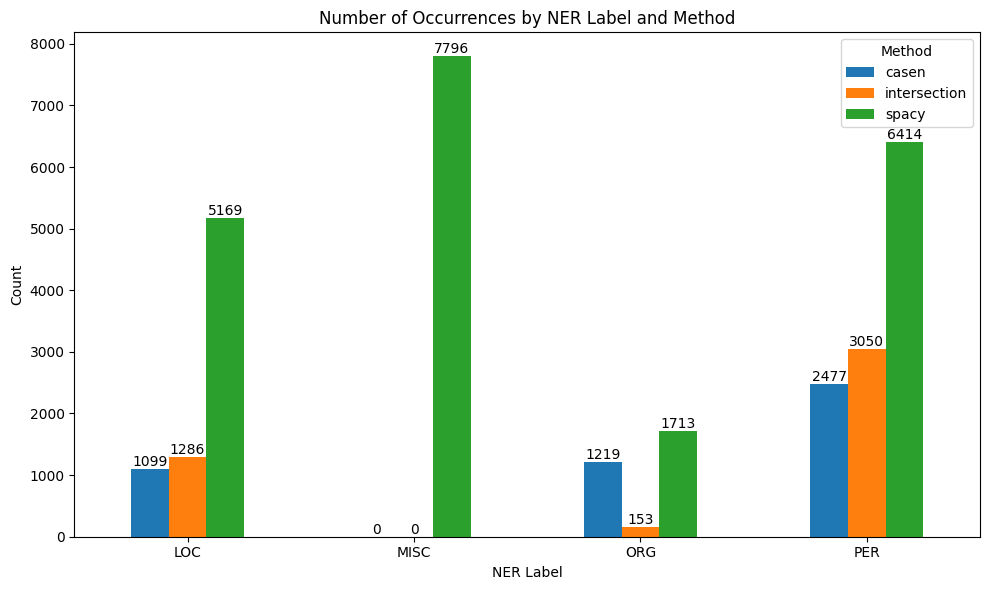

In [ ]:
def evaluate(df):

    NER_label = df["NER_label"].unique().tolist()
    NER_label = [label for label in NER_label if label not in [",", "", None]] # clean weard labels

    grouped = df.groupby(['NER_label', 'method']).size()

    counts = grouped.reset_index(name='count')
    counts['method'] = counts['method'].str.lower()
    pivot = counts.pivot(index='NER_label', columns='method', values='count')

    ax = pivot.plot(kind='bar', figsize=(10, 6))
    plt.title('Number of Occurrences by NER Label and Method')
    plt.ylabel('Count')
    plt.xlabel('NER Label')
    plt.xticks(rotation=0)
    plt.legend(title='Method')
    plt.tight_layout()

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10)

    plt.show()

evaluate(df)

In [71]:

def casen_vs_spacy(df, error_name="PERS", X_size=8, Y_size=6):
    """
        For every label, show the count of errors for spacy and casEN.
    """
    filtered_df = df[(df["well categorized"] == error_name) &
                     (df["well categorized"] != df["well recognized"])]

    grouped_df = filtered_df.groupby("method")
    
    counts = grouped_df.size()
    
    plt.figure(figsize=(X_size, Y_size))
    bars = plt.bar(counts.index, counts.values, color='skyblue')
    plt.xlabel("method", fontsize=12)
    plt.ylabel("Number of Occurrences", fontsize=12)
    plt.title(f"Not well recognized as : {error_name}", fontsize=14)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{int(height)}', ha='center', va='bottom', fontsize=12)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


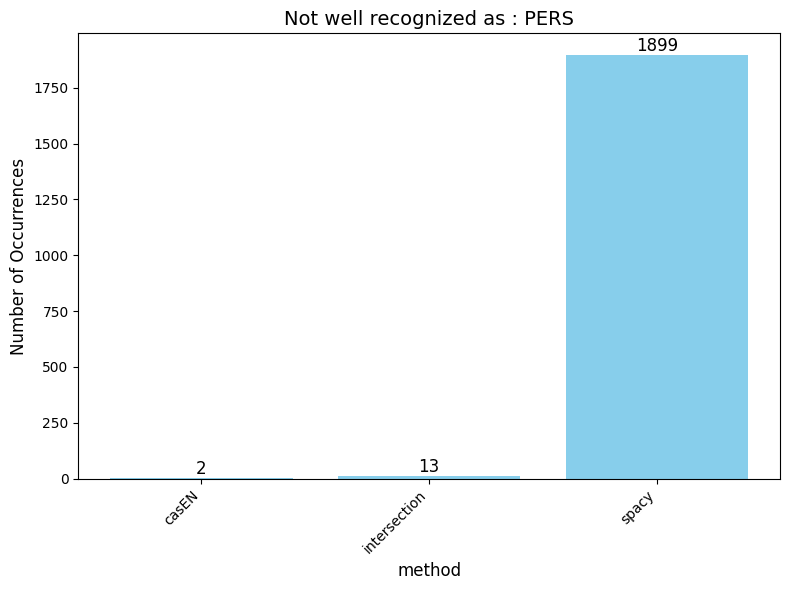

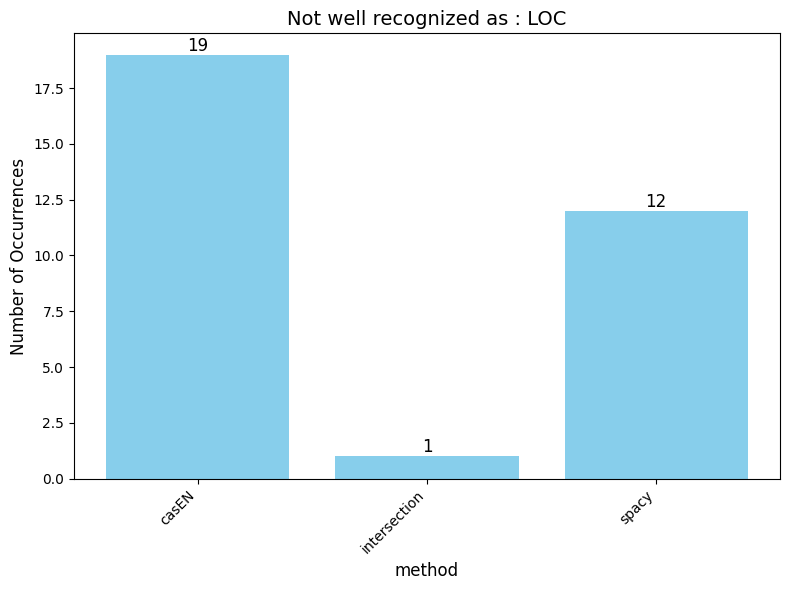

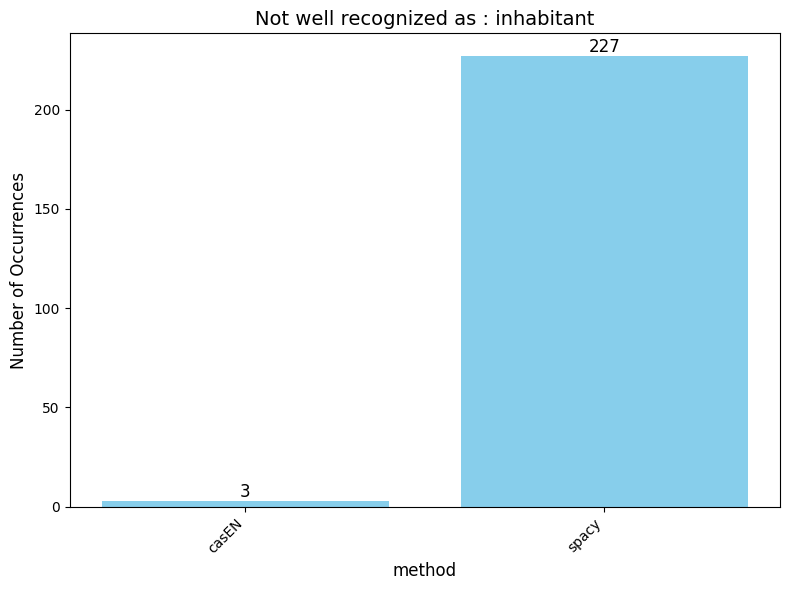

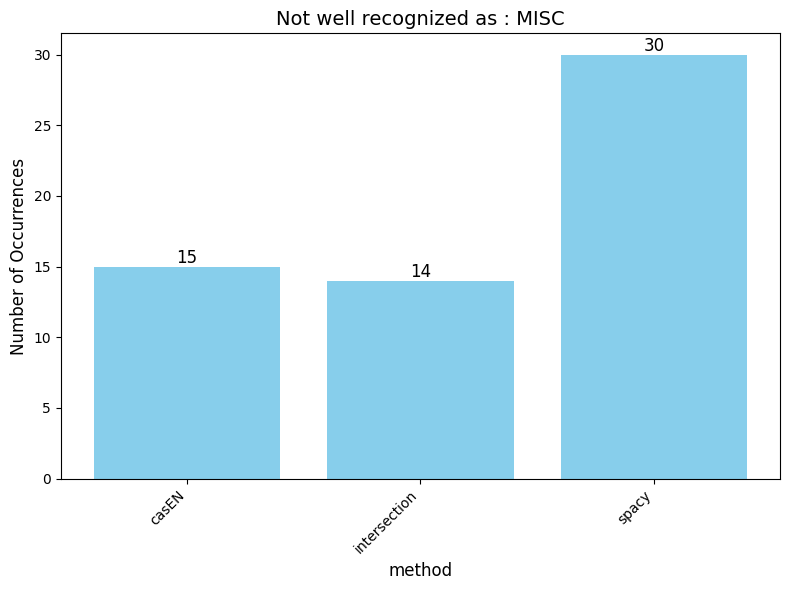

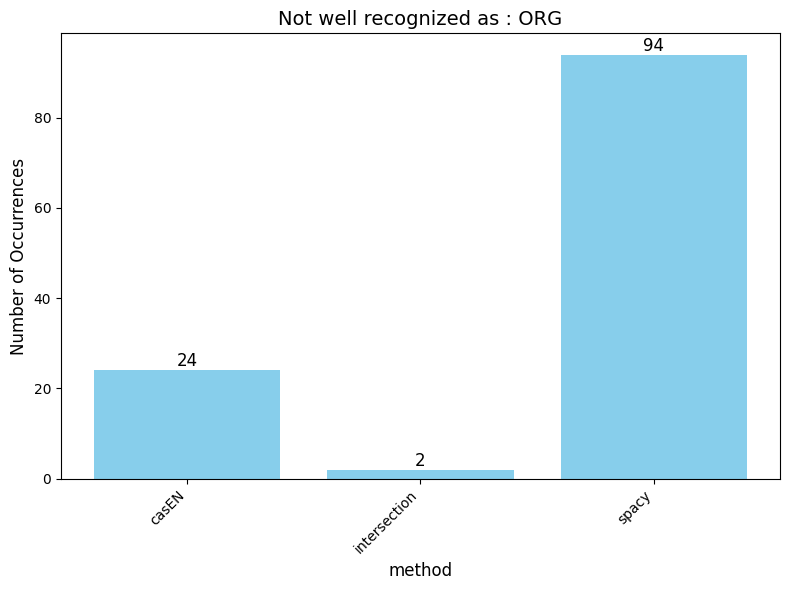

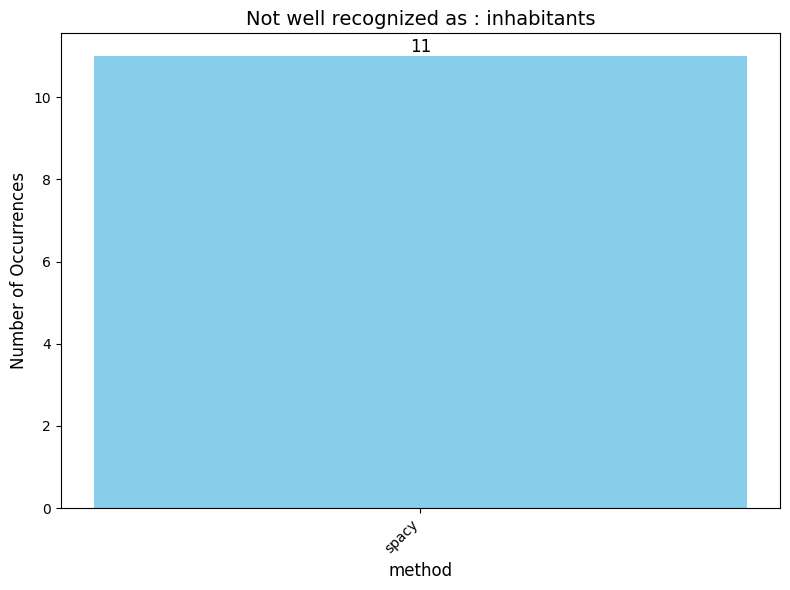

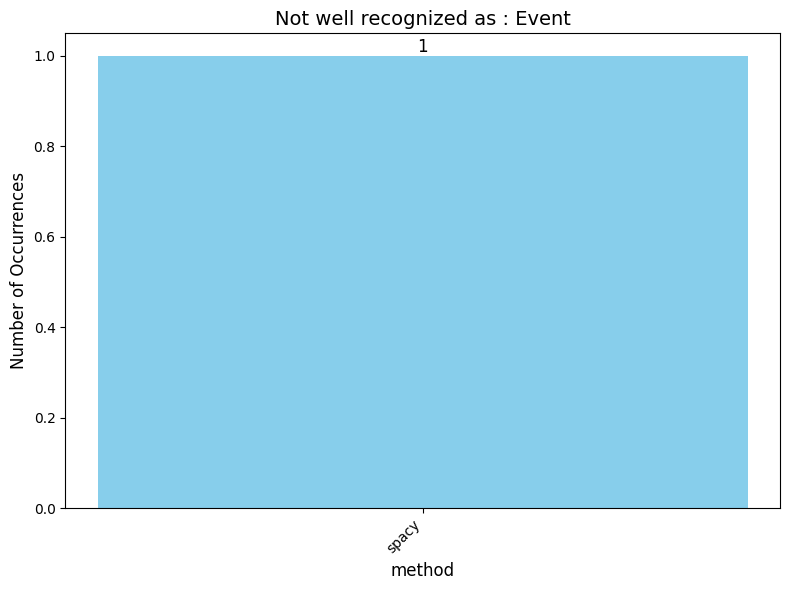

In [72]:
errors = df["well categorized"].dropna().unique().tolist()
filtre = [0,1,3]
errors = [error for error in errors if error not in filtre]
for error in errors:
    casen_vs_spacy(df, error)

In [92]:

def casen_vs_spacy2(df, error_name="PERS", X_size=8, Y_size=6):
    # Filtrer les erreurs (discordances)
    filtered_df = df[(df["well categorized"] == error_name) &
                     (df["well categorized"] != df["well recognized"])]

    # Calculer les erreurs par méthode
    error_counts = filtered_df.groupby("method").size()

    # Calculer le nombre total de `error_name` dans NER_label par méthode
    if error_name == "PERS":
        error_name = "PER"
    total_counts = df[df["NER_label"] == error_name].groupby("method").size()

    # Préparer les données pour l'affichage
    methods = sorted(set(error_counts.index).union(total_counts.index))  # Assure que toutes les méthodes soient présentes
    error_values = [error_counts.get(method, 0) for method in methods]  # Valeurs des erreurs (0 si la méthode n'existe pas dans error_counts)
    total_values = [total_counts.get(method, 0) for method in methods]  # Valeurs totales (0 si la méthode n'existe pas dans total_counts)

    # Création du graphique à barres
    plt.figure(figsize=(X_size, Y_size))

    bar_width = 0.4  # Largeur des barres
    positions = range(len(methods))

    # Barres pour les erreurs
    plt.bar(positions, error_values, width=bar_width, label=f"recognized but not as {error_name}", color='skyblue')

    # Barres pour les valeurs totales (shiftées à droite)
    plt.bar([pos + bar_width for pos in positions], total_values, width=bar_width, label="Total found", color='orange')

    # Ajout des étiquettes
    plt.xlabel("Method", fontsize=12)
    plt.ylabel("Number of Occurrences", fontsize=12)
    plt.title(f"Error for the tag:  {error_name}", fontsize=14)
    plt.xticks([pos + bar_width / 2 for pos in positions], methods, rotation=45, ha='right')  # Centrer les étiquettes entre les deux barres
    plt.legend()

    # Annoter les valeurs des barres
    for i, val in enumerate(error_values):
        plt.text(i, val + 1, str(val), ha='center', fontsize=10)
    for i, val in enumerate(total_values):
        plt.text(i + bar_width, val + 1, str(val), ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()


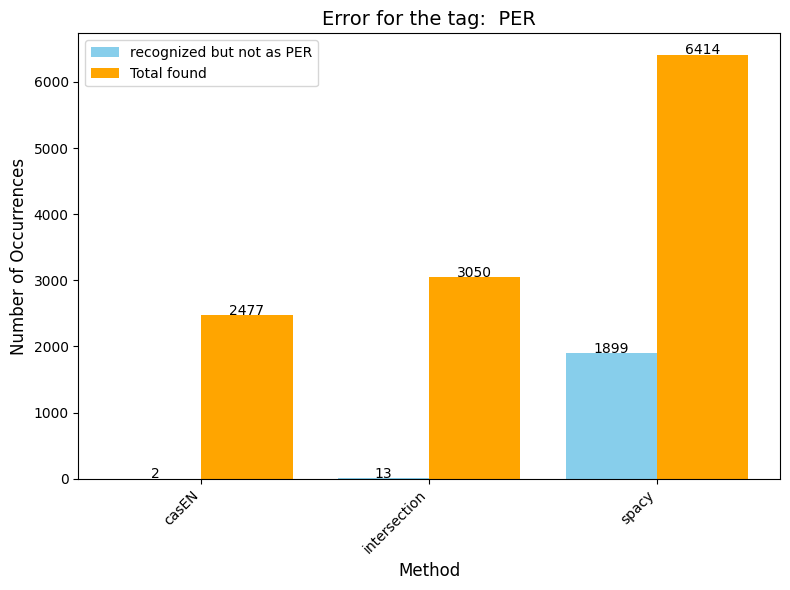

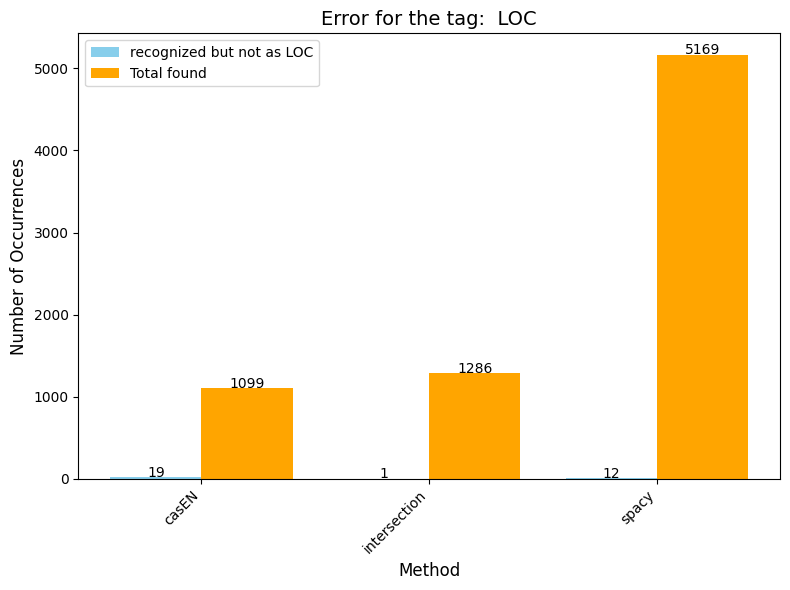

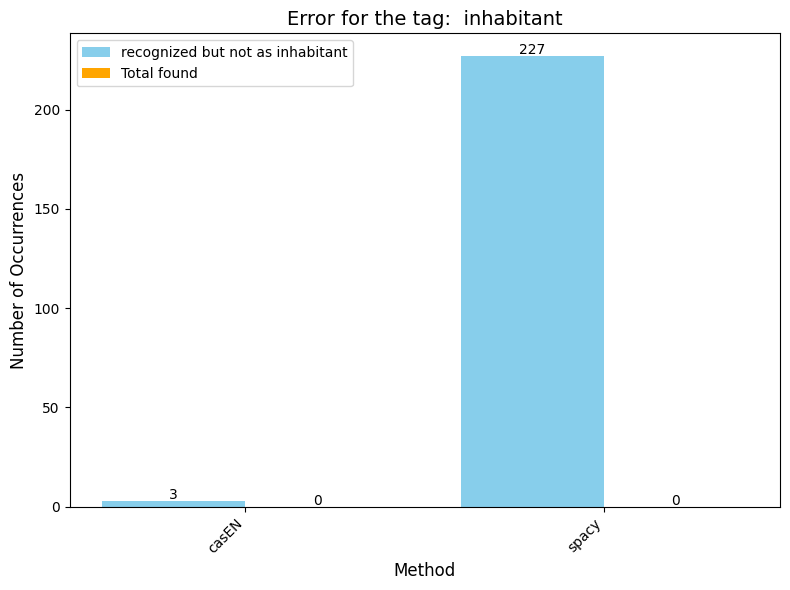

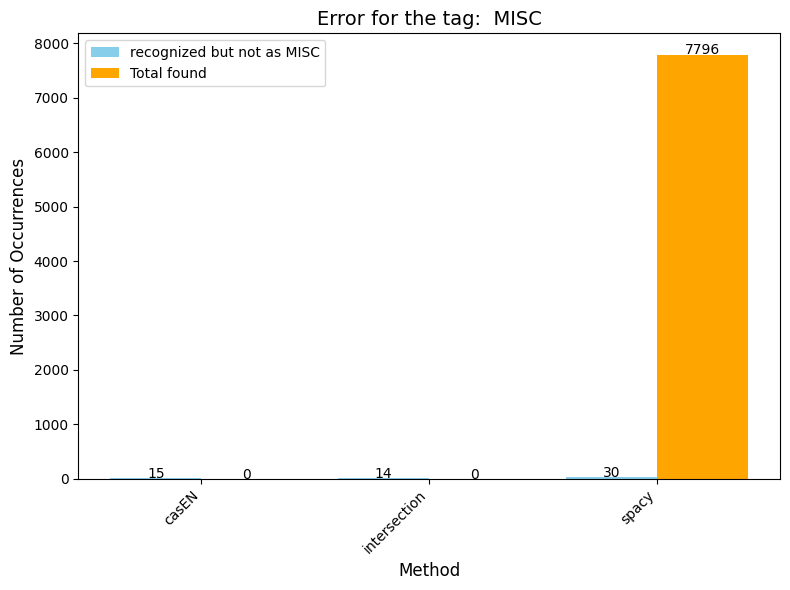

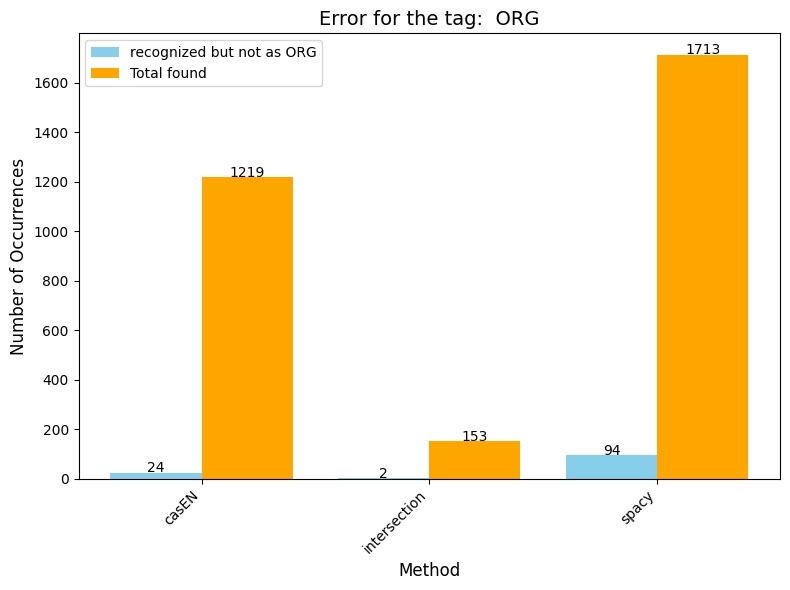

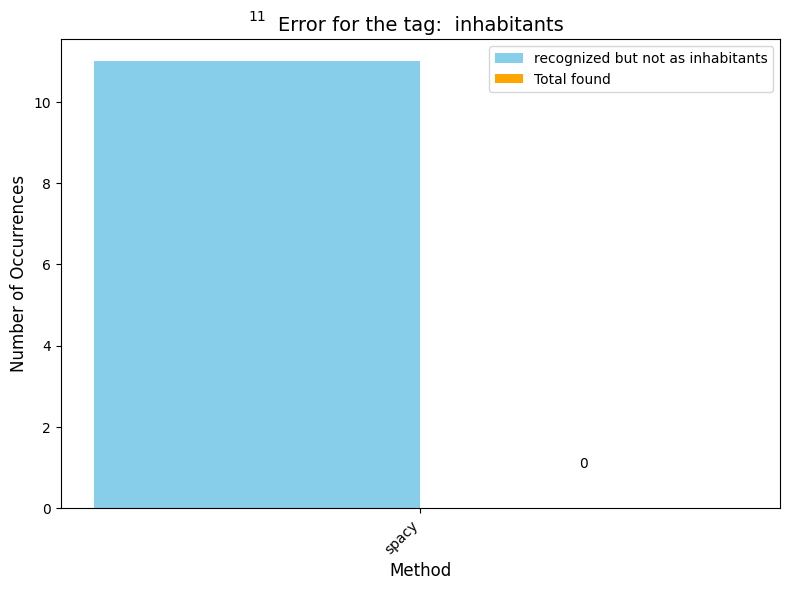

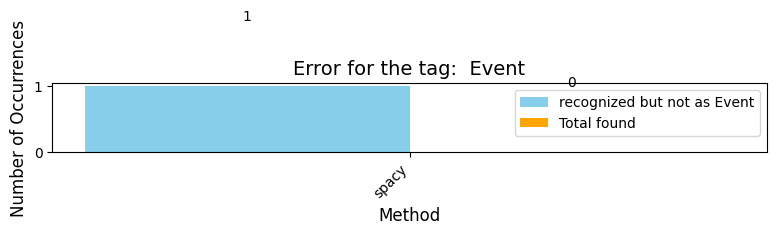

In [93]:
for error in errors:
    casen_vs_spacy2(df, error)

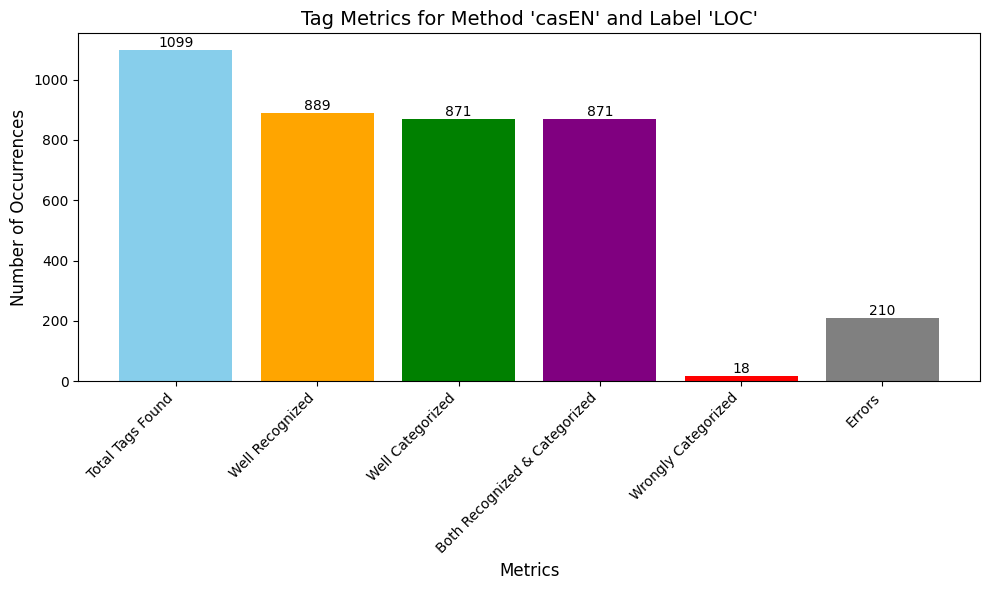

In [110]:
def show_bar_chart(df, method="casEN", label="PER"):
    """
    Afficher un bar chart basé sur les données filtrées par méthode et label.
    """
    # Filtrer selon la méthode
    df_method = df[df["method"] == method]
    
    # Calculer les métriques
    nb_tag_found = len(df_method[(df_method["NER_label"] == label)])
    well_recognized = len(df_method[(df_method["NER_label"] == label) & (df_method["well recognized"] == 1)])
    well_categorized = len(df_method[(df_method["NER_label"] == label) & (df_method["well categorized"] == 1)])
    well_both = len(df_method[(df_method["NER_label"] == label) & 
                              (df_method["well categorized"] == 1) & 
                              (df_method["well recognized"] == 1)])
    categorized_as_label_wrongly = len(df_method[(df_method["NER_label"] == label) & 
                                                 (df_method["well recognized"] == 1) & 
                                                 (df_method["well categorized"] != 1)])
    errors = len(df_method[(df_method["NER_label"] == label) & 
                           (df_method["well recognized"] == 0) & 
                           (df_method["well categorized"] == 0)])
    
    # Préparer les données pour le graphique
    labels = [
        "Total Tags Found",
        "Well Recognized",
        "Well Categorized",
        "Both Recognized & Categorized",
        "Wrongly Categorized",
        "Errors"
    ]
    values = [
        nb_tag_found,
        well_recognized,
        well_categorized,
        well_both,
        categorized_as_label_wrongly,
        errors
    ]
    
    # Créer le graphique
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, values, color=['skyblue', 'orange', 'green', 'purple', 'red', 'gray'])
    plt.xlabel("Metrics", fontsize=12)
    plt.ylabel("Number of Occurrences", fontsize=12)
    plt.title(f"Tag Metrics for Method '{method}' and Label '{label}'", fontsize=14)

    # Annoter les barres avec leurs valeurs
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

show_bar_chart(df, "casEN", "LOC")